# Homework 1
 Trevor Tomlin
 
 Michael Theisen
 
 01/15/2023

1.a.  Write R code to compute the correlation coefficient between all pairs of drugs. Then, plot a histogram of the correlation. What is the median correlation across all pairs of drugs?

In [234]:
getwd()

[1] "/home/jovyan"

In [235]:
geneTable.data <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)

[1] "The median correlation across all pairs of drugs is:  0.00905093254337837"


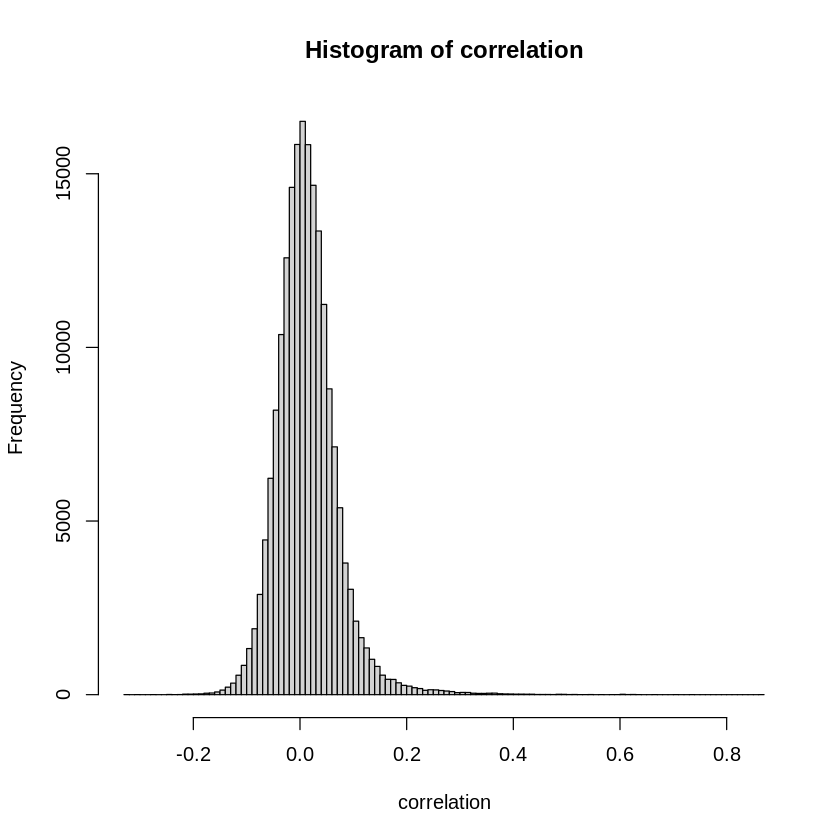

In [236]:
# Assign the first column of geneTable.data to become rownames
dimnames(geneTable.data)[[1]] <- geneTable.data[,1]

# Get rid of column 1 in geneTable.data
geneTable.data <- geneTable.data[, -1]

# Transpose the matrix so that Drugs are compared to Drugs
transposedGeneTable.data <- t(geneTable.data)
correlation <- cor(transposedGeneTable.data)

# Remove diagonal entries
diag(correlation) <- NA

# Find median
medcor <- median(correlation, na.rm=TRUE)
print(paste("The median correlation across all pairs of drugs is: ", (medcor)))

# Histogram of Correlation
hist(correlation, nclass=100)

1.b. Name the drug pair that gives the highest correlation coefficient (i.e. closest to 1). Produce a scatter plot to show the relationship between this pair of drugs using R.

In [237]:
# Name the drug pair that gives the highest correlation coefficient (i.e. closest to 1).
maxcor <- max(correlation, na.rm = TRUE)
max = which((correlation) == max((correlation), na.rm = TRUE),  arr.ind = TRUE)  
print(paste("The drug pair that gives the highest correlation coefficient of: ", (maxcor)))
print(max)

[1] "The drug pair that gives the highest correlation coefficient of:  0.861963320302171"
                 row col
OXYMETHOLONE     384 210
5-FLUOROCYTOSINE 210 384


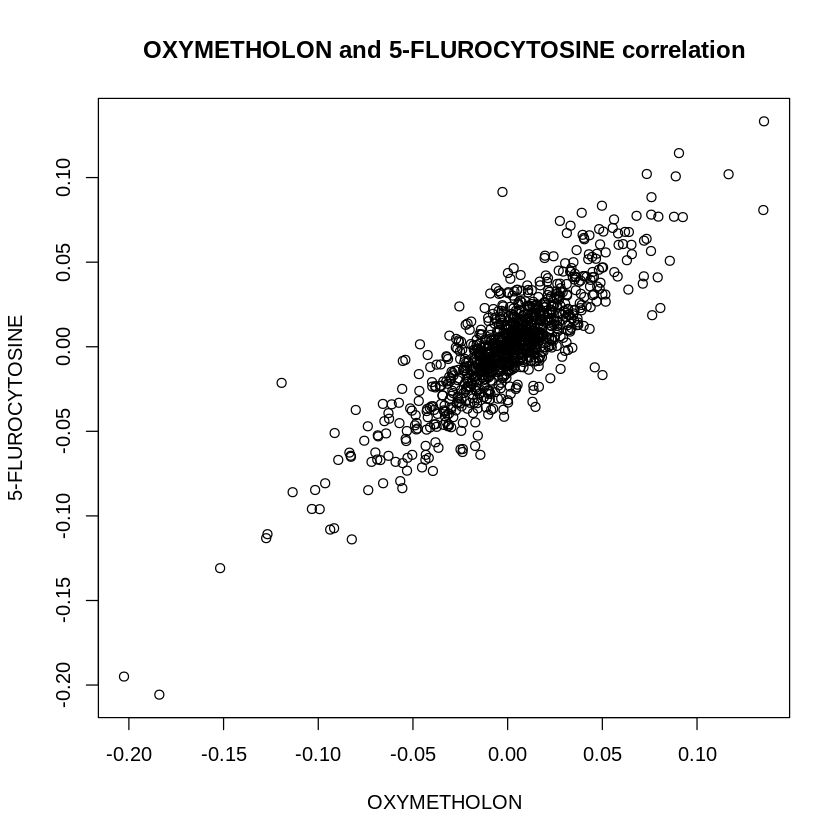

In [238]:
# Produce a scatter plot to show the relationship between this pair of drugs using R.
x <- as.vector (unlist(geneTable.data["OXYMETHOLON",]), mode="numeric")
y <- as.vector (unlist(geneTable.data["5-FLUOROCYTOSINE",]), mode="numeric")
plot (x, y, xlab = "OXYMETHOLON" , ylab = "5-FLUROCYTOSINE", main ="OXYMETHOLON and 5-FLUROCYTOSINE correlation")

1.c. Name 10 drug pairs that give the top 10 highest correlation coefficients (i.e.closest to 1). 

In [239]:
# Name 10 drug pairs that give the top 10 highest correlation coefficients (i.e.closest to 1).
drugs_cor_upper <- correlation
drugs_cor_upper[lower.tri(drugs_cor_upper)] <- NA
max10 <- which(-drugs_cor_upper<=sort(-drugs_cor_upper)[10], arr.ind = TRUE, useNames = TRUE)
p1 <- rownames(max10)
p2 <- vector()
pair10cor <- vector()
for (i in 1:dim(max10)[1])
{
    r <- max10[i,1]
    c <- max10[i,2]
    n <- dimnames(correlation)[[2]][c]
    c <- correlation[r,c]
    p2 <- append(p2, n)
    pair10cor <- append(pair10cor, c)
}
top10pairs <- matrix(c(p1,p2,pair10cor),nrow=length(p1))
top10pairs <- top10pairs[order(top10pairs[,3],decreasing=TRUE),]
colnames(top10pairs) <- c("Drug 1","Drug 2","Correlation")
top10pairs

Drug 1,Drug 2,Correlation
5-FLUOROCYTOSINE,OXYMETHOLONE,0.861963320302171
NORETHISTERONE,5-FLUOROCYTOSINE,0.732875722954109
NORETHISTERONE,OXYMETHOLONE,0.708034374496256
TOLAZAMIDE,DEXAMETHASONE,0.6603695104017
BALSALAZIDE,OXYMETHOLONE,0.636199299251868
LEVONORGESTREL,TACRINE,0.624139232628252
NORTRIPTYLINE,NORETHISTERONE,0.622455419940077
TACRINE,PAROXETINE,0.622040755926034
FLUTAMIDE,TOLAZAMIDE,0.614926578177448
5-FLUOROCYTOSINE,BALSALAZIDE,0.613289476157313


1.d. Name the drug pair that gives the lowest correlation (i.e. closest to -1). Produce a scatter plot to show the relationship between this pair of drugs using R.  

In [240]:
# Name the drug pair that gives the lowest correlation coefficient (i.e. closest to -1).
mincor <- min(correlation, na.rm = TRUE)
min = which((correlation) == min((correlation), na.rm = TRUE),  arr.ind = TRUE)  
print(paste("The drug pair that gives the lowest correlation coefficient of: ", (mincor)))
print(min)

[1] "The drug pair that gives the lowest correlation coefficient of:  -0.325656371832598"
            row col
ROPIVACAINE 419 126
SALMETEROL  126 419


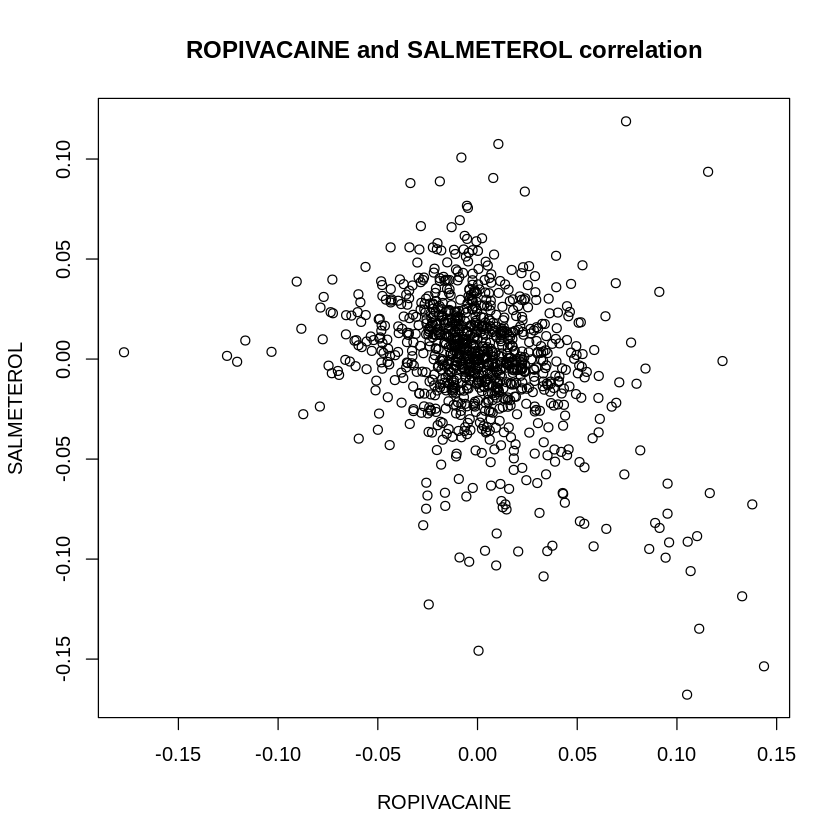

In [241]:
# Produce a scatter plot to show the relationship between this pair of drugs using R.
x <- as.vector (unlist(geneTable.data["ROPIVACAINE",]), mode="numeric")
y <- as.vector (unlist(geneTable.data["SALMETEROL",]), mode="numeric")
plot (x, y, xlab = "ROPIVACAINE" , ylab = "SALMETEROL", main ="ROPIVACAINE and SALMETEROL correlation")

1.e. Name the most similar drug for each of the following:  
&emsp; i. CLOFARABINE  
&emsp; ii. DAUNORUBICIN  
&emsp; iii. FLUDARABINE

In [242]:
# Name the most similar drug for each of the following: i. CLOFARABINE, ii. DAUNORUBICIN, iii. FLUDARABINE
m <- as.matrix(dist(correlation))
diag(m) <- NA
m[lower.tri(m)] <- NA
min_cl <- colnames(m)[which(m == min(m['CLOFARABINE',], na.rm=TRUE), arr.ind = TRUE)[,2]]
print(paste("The most similar drug for CLOFARABINE is:", (min_cl)))
min_da <- colnames(m)[which(m == min(m['DAUNORUBICIN',], na.rm=TRUE), arr.ind = TRUE)[,2]]
print(paste("The most similar drug for DAUNORUBICIN is:", (min_da)))
min_fl <- colnames(m)[which(m == min(m['FLUDARABINE',], na.rm=TRUE), arr.ind = TRUE)[,2]]
print(paste("The most similar drug for FLUDARABINE is:", (min_fl)))

[1] "The most similar drug for CLOFARABINE is: PYRIMETHAMINE"
[1] "The most similar drug for DAUNORUBICIN is: CLOFARABINE"
[1] "The most similar drug for FLUDARABINE is: PYRIMETHAMINE"


2.a. In class, we discussed the use of publicly available databases for biomedical applications.  Which database would you use to learn more about the drugs identified in Q1e? Using this database, what additional information did you learn about the drug most similar to CLOFARABINE?

The publicly available database that we would use to learn more about the drug similar to Clofarabine is PubMed. The medication we found to be most like it was Pyrimethamine.  

Using this database, we was able to discover details about Pyrimethamine and how it was recently demonstrated in clinical trials to "reduce the expression of STAT3 signature genes in tumor tissues of chronic lymphocytic leukemia patients with a good therapeutic response" as well as other "antitumor effects" in a variety of other bodily organs. 

Ramchandani S, Mohan CD, Mistry JR, Su Q, Naz I, Rangappa KS, Ahn KS. The multifaceted antineoplastic role of pyrimethamine against human malignancies. IUBMB Life. 2022 Mar;74(3):198-212. doi: 10.1002/iub.2590. Epub 2022 Jan 5. PMID: 34921584.

2.b. Use PubMed to search for publications on CLOFARABINE. Provide full citation information of one of the papers you found. 


To further verify the answer for Questions 1.e., we continued research on the original medication Clofarabine in order to ensure its similarities to Pyrimethamine. We were able to find the mechanism of action for Clofarabine. We found that Clofarabine acts by "inhibiting ribonucleotide reductase and DNA polymerase, thereby depleting the amount of intracellular deoxynucleoside triphosphates available for DNA replication." From what we can gather, this depletion of intracellular deoxynucleoside triphosphates is key to inhibiting DNA replication that can lead to cancerous growth in leukemia patients. The article went on to continue explaining the value of this medication in particular due to its stability above others that have similar uses. From this information, we were able to further confirm the similarities between Clofarabine and Pyrimethamine due to their similar uses and reducing cancerous growth.  

Ghanem H, Jabbour E, Faderl S, Ghandhi V, Plunkett W, Kantarjian H. Clofarabine in leukemia. Expert Rev Hematol. 2010 Feb;3(1):15-22. doi: 10.1586/ehm.09.70. PMID: 21082931.